In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/metu_ring_processed.csv')

In [3]:
df.head()

,Gender,Residence,Study_Level,Faculty,Grad_School,Visiting_Faculty_GradSchool,Affiliation_Program,Weekday_Schedule_Satisfaction,Weekend_Schedule_Satisfaction,Understanding_Routes,...,TimeWkend_Afternoon_15:00_19:00,TimeWkend_Late_19:00_23:00,Total_Usage_Score,Problem_Severity_Index,Heavy_User,Residence_Simplified,Route_Count,Purpose_Count,Reason_Count,UseMore_Binary
0,Male,"East Dorms (1st Dorm, 2nd Dorm, 16th Guesthous...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,2,1,1.0,...,1,1,5,4.125,0,East_Dorms,2,3,2,1.0
1,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Arts and Sciences,NaN,NaN,NaN,4,3,3.0,...,0,1,8,2.500,1,West_Dorms,2,6,1,1.0
2,Female,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,2,2,5.0,...,1,1,8,3.125,1,West_Dorms,3,5,2,1.0
3,Male,"West Dorms (Isa Demiray Student Dormitory, 19t...",Undergraduate (Bachelor’s),Faculty of Engineering,NaN,NaN,NaN,3,2,5.0,...,0,0,8,2.500,1,West_Dorms,1,2,2,1.0
4,Male,Off-campus (within walking distance),Undergraduate (Bachelor’s),Faculty of Economic and Administrative Sciences,NaN,NaN,NaN,4,3,2.0,...,0,1,5,2.250,1,Off_Campus_Near,4,4,1,1.0


In [4]:
df['Residence'] = df['Residence'].replace(
    'Postgraduate Guesthouse', 
    'West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)'
)

In [5]:
df['Residence'].value_counts()

Residence
East Dorms (1st Dorm, 2nd Dorm, 16th Guesthouse, etc.)         138
West Dorms (Isa Demiray Student Dormitory, 19th Dorm, etc.)    117
Off-campus (far from campus)                                    56
Off-campus (within walking distance)                            14
Name: count, dtype: int64

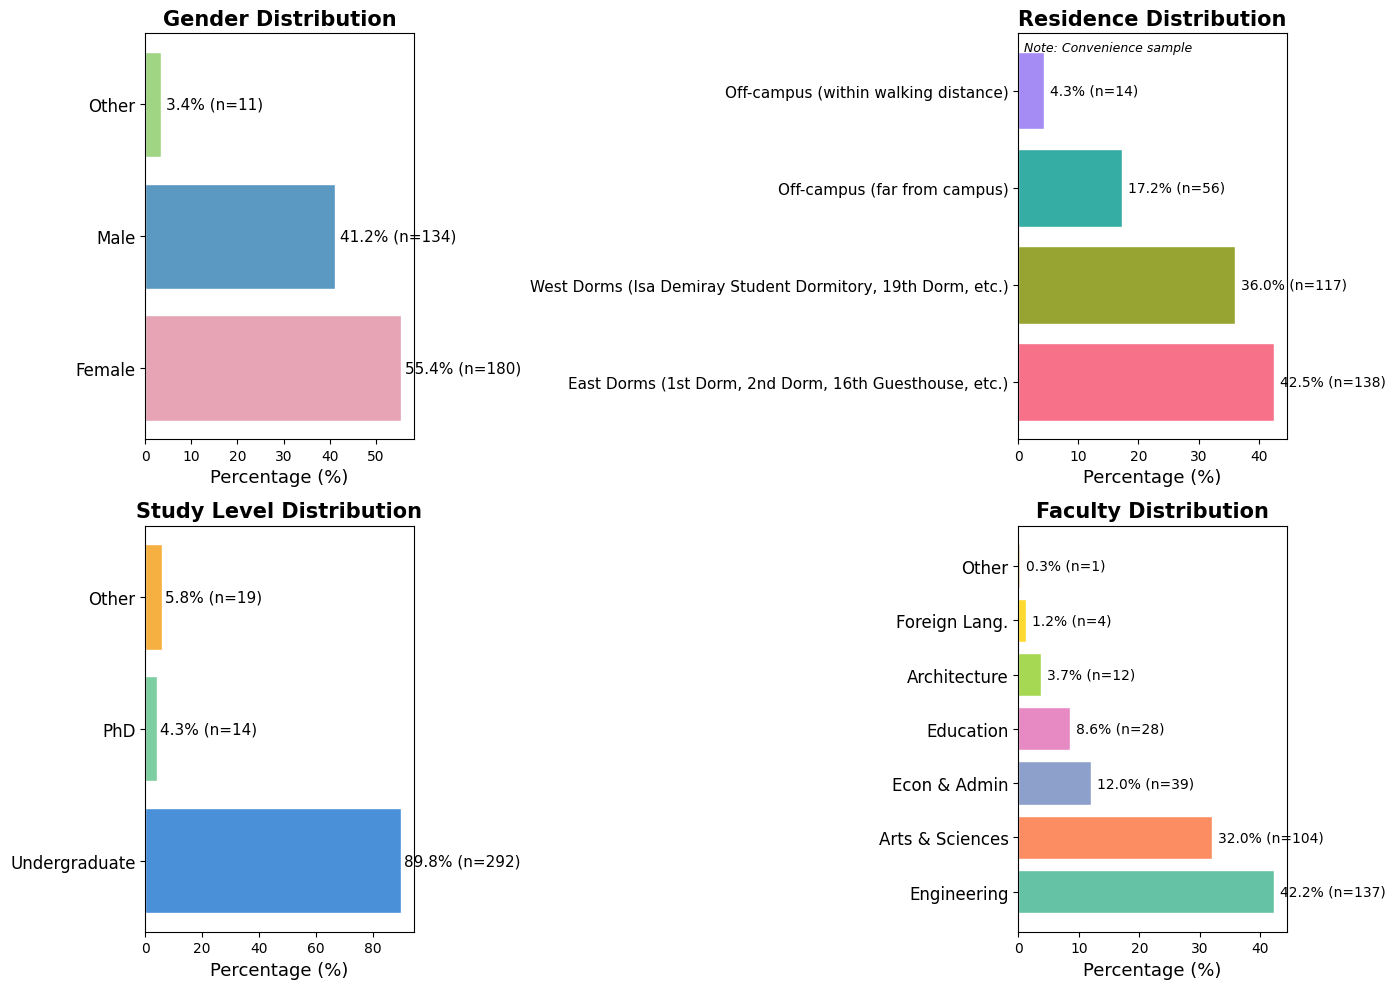

In [6]:
# =============================================================================
# FIGURE 1: Demographic Profile - ALL BARS (No Pies)
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender - BAR CHART
ax1 = axes[0, 0]
gender_counts = df['Gender'].value_counts()
gender_pct = (gender_counts / len(df) * 100).round(1)
colors = ['#E6A4B4', '#5B99C2', '#A0D683']
bars = ax1.barh(range(len(gender_counts)), gender_pct.values, color=colors, edgecolor='white')
ax1.set_yticks(range(len(gender_counts)))
ax1.set_yticklabels(gender_counts.index, fontsize=12)
ax1.set_xlabel('Percentage (%)', fontsize=13)
ax1.set_title('Gender Distribution', fontweight='bold', fontsize=15)
for i, (pct, count) in enumerate(zip(gender_pct.values, gender_counts.values)):
    ax1.text(pct + 1, i, f'{pct:.1f}% (n={count})', va='center', fontsize=11)

# Residence - Already a bar, but add note about convenience sample
ax2 = axes[0, 1]
residence_counts = df['Residence'].value_counts()
residence_pct = (residence_counts / len(df) * 100).round(1)
colors2 = sns.color_palette("husl", len(residence_counts))
bars = ax2.barh(range(len(residence_counts)), residence_pct.values, color=colors2, edgecolor='white')
ax2.set_yticks(range(len(residence_counts)))
ax2.set_yticklabels(residence_counts.index, fontsize=11)
ax2.set_xlabel('Percentage (%)', fontsize=13)
ax2.set_title('Residence Distribution', fontweight='bold', fontsize=15)
for i, (pct, count) in enumerate(zip(residence_pct.values, residence_counts.values)):
    ax2.text(pct + 1, i, f'{pct:.1f}% (n={count})', va='center', fontsize=10)
ax2.text(0.02, 0.98, 'Note: Convenience sample', transform=ax2.transAxes, 
         fontsize=9, style='italic', ha='left', va='top')

# Study Level - BAR CHART (not pie)
ax3 = axes[1, 0]
study_counts = df['Study_Level'].value_counts()
# Combine small groups
undergrad_count = study_counts[study_counts.index.str.contains('Undergrad|Bachelor', case=False, na=False)].sum()
phd_count = study_counts[study_counts.index.str.contains('PhD|Doctoral', case=False, na=False)].sum()
others_count = study_counts.sum() - undergrad_count - phd_count
combined_study = pd.Series({
    'Undergraduate': undergrad_count,
    'PhD': phd_count,
    'Other': others_count
})
combined_study = combined_study[combined_study > 0]
study_pct = (combined_study / len(df) * 100).round(1)
colors3 = ['#4A90D9', '#7DCEA0', '#F5B041']
bars = ax3.barh(range(len(combined_study)), study_pct.values, 
                color=colors3[:len(combined_study)], edgecolor='white')
ax3.set_yticks(range(len(combined_study)))
ax3.set_yticklabels(combined_study.index, fontsize=12)
ax3.set_xlabel('Percentage (%)', fontsize=13)
ax3.set_title('Study Level Distribution', fontweight='bold', fontsize=15)
for i, (pct, count) in enumerate(zip(study_pct.values, combined_study.values)):
    ax3.text(pct + 1, i, f'{pct:.1f}% (n={count})', va='center', fontsize=11)

# Faculty - Already a bar, keep it
ax4 = axes[1, 1]
faculty_counts = df['Faculty'].value_counts()
faculty_pct = (faculty_counts / len(df) * 100).round(1)
faculty_labels_short = ['Engineering', 'Arts & Sciences', 'Econ & Admin', 'Education', 
                        'Architecture', 'Foreign Lang.', 'Other']
colors4 = sns.color_palette("Set2", len(faculty_counts))
bars = ax4.barh(range(len(faculty_counts)), faculty_pct.values, color=colors4, edgecolor='white')
ax4.set_yticks(range(len(faculty_counts)))
ax4.set_yticklabels(faculty_labels_short, fontsize=12)
ax4.set_xlabel('Percentage (%)', fontsize=13)
ax4.set_title('Faculty Distribution', fontweight='bold', fontsize=15)
for i, (pct, count) in enumerate(zip(faculty_pct.values, faculty_counts.values)):
    ax4.text(pct + 1, i, f'{pct:.1f}% (n={count})', va='center', fontsize=10)

plt.tight_layout()
plt.show()
plt.close()

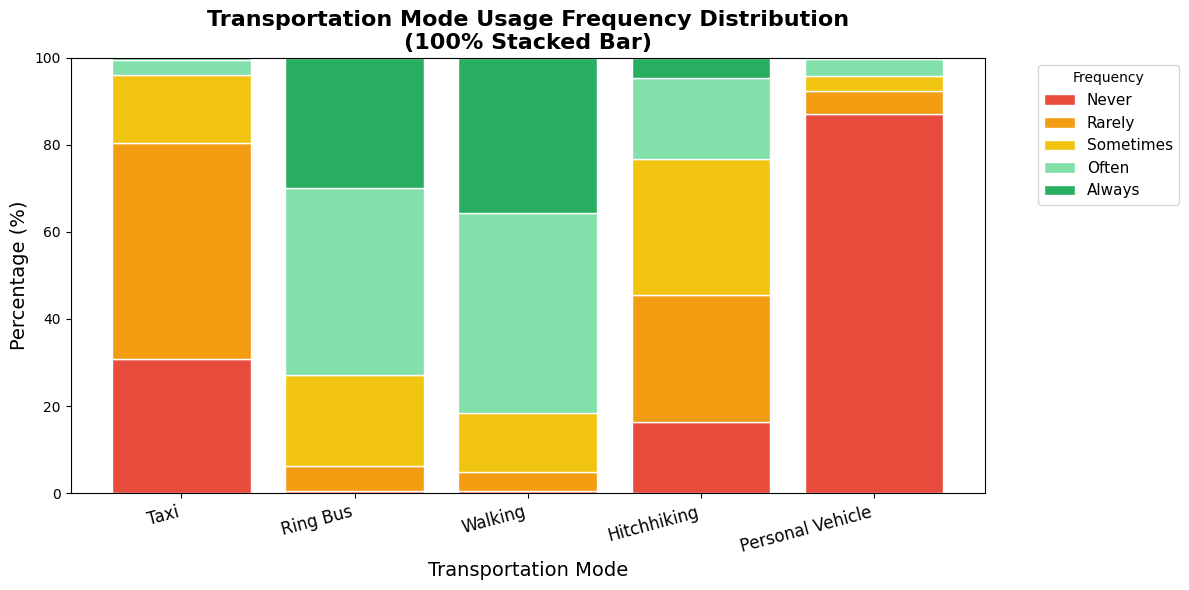

In [14]:
# =============================================================================
# FIGURE 2: Transportation Mode - 100% STACKED BAR (FIXED)
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

transport_vars = ['Freq_Taxi', 'Freq_Ring', 'Freq_Walking', 'Freq_Hitchhiking', 'Freq_PersonalVehicle']
transport_labels = ['Taxi', 'Ring Bus', 'Walking', 'Hitchhiking', 'Personal Vehicle']

# Map frequency to categories
def map_freq_to_category(val):
    if pd.isna(val):
        return 'Never'
    if val <= 1:
        return 'Never'
    elif val <= 2:
        return 'Rarely'
    elif val <= 3:
        return 'Sometimes'
    elif val <= 4:
        return 'Often'
    else:
        return 'Always'

# Create stacked data
stacked_data = {}
for var, label in zip(transport_vars, transport_labels):
    categories = df[var].apply(map_freq_to_category)
    stacked_data[label] = categories.value_counts(normalize=True) * 100

stacked_df = pd.DataFrame(stacked_data).fillna(0)
stacked_df = stacked_df.reindex(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], fill_value=0)

# Plot stacked bar
colors_stack = ['#E74C3C', '#F39C12', '#F1C40F', '#82E0AA', '#27AE60']
bottom = np.zeros(len(transport_labels))
for i, (category, color) in enumerate(zip(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], colors_stack)):
    if category in stacked_df.index:
        values = stacked_df.loc[category].values
        ax.bar(transport_labels, values, bottom=bottom, label=category, color=color, edgecolor='white')
        bottom += values

ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_xlabel('Transportation Mode', fontsize=14)
ax.set_title('Transportation Mode Usage Frequency Distribution\n(100% Stacked Bar)', 
              fontweight='bold', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xticks(range(len(transport_labels)))  # FIX: Set ticks first
ax.set_xticklabels(transport_labels, rotation=15, ha='right', fontsize=12)
ax.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()

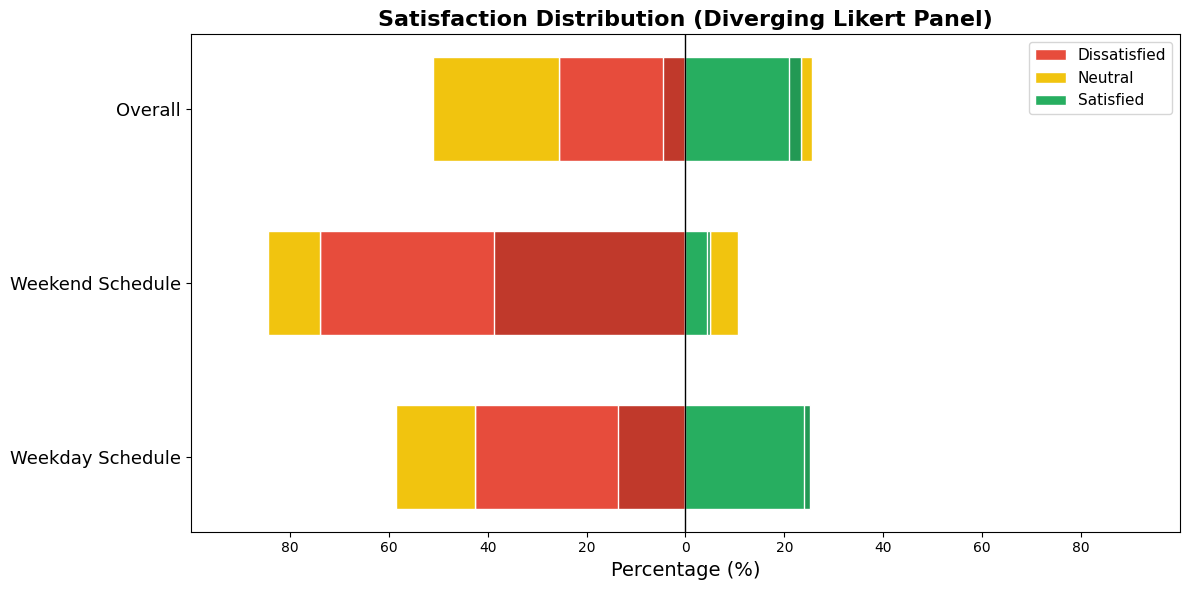

In [8]:
# =============================================================================
# FIGURE 3: Satisfaction - DIVERGING LIKERT PANEL
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

sat_vars = ['Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction', 'Overall_Satisfaction']
sat_labels = ['Weekday Schedule', 'Weekend Schedule', 'Overall']

# Create diverging stacked bars
def create_likert_data(col):
    counts = df[col].value_counts().sort_index()
    total = counts.sum()
    return {
        'Very Dissatisfied': counts.get(1, 0) / total * 100,
        'Dissatisfied': counts.get(2, 0) / total * 100,
        'Neutral': counts.get(3, 0) / total * 100,
        'Satisfied': counts.get(4, 0) / total * 100,
        'Very Satisfied': counts.get(5, 0) / total * 100
    }

likert_data = pd.DataFrame({label: create_likert_data(var) for var, label in zip(sat_vars, sat_labels)})

# Colors: red (dissatisfied) to green (satisfied)
colors_likert = ['#E74C3C', '#F39C12', '#F1C40F', '#82E0AA', '#27AE60']

# Plot diverging bars (dissatisfied on left, satisfied on right)
y_pos = np.arange(len(sat_labels))
width = 0.6

# Left side (dissatisfied)
left_neg = likert_data.loc[['Very Dissatisfied', 'Dissatisfied']].sum()
left_neutral = likert_data.loc['Neutral']
left_pos = likert_data.loc[['Satisfied', 'Very Satisfied']].sum()

# Plot negative side
ax.barh(y_pos, -left_neg.values, width, color='#E74C3C', label='Dissatisfied', edgecolor='white')
ax.barh(y_pos, -likert_data.loc['Very Dissatisfied'].values, width, color='#C0392B', edgecolor='white')

# Plot neutral
ax.barh(y_pos, -left_neutral.values/2, width, left=-left_neg.values, color='#F1C40F', 
        label='Neutral', edgecolor='white')
ax.barh(y_pos, left_neutral.values/2, width, left=0, color='#F1C40F', edgecolor='white')

# Plot positive side
ax.barh(y_pos, left_pos.values, width, left=0, color='#27AE60', label='Satisfied', edgecolor='white')
ax.barh(y_pos, likert_data.loc['Very Satisfied'].values, width, left=left_pos.values-likert_data.loc['Very Satisfied'].values, 
        color='#229954', edgecolor='white')

ax.set_yticks(y_pos)
ax.set_yticklabels(sat_labels, fontsize=13)
ax.set_xlabel('Percentage (%)', fontsize=14)
ax.set_title('Satisfaction Distribution (Diverging Likert Panel)', fontweight='bold', fontsize=16)
ax.axvline(x=0, color='black', linewidth=1)
ax.set_xlim(-100, 100)
ax.set_xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80])
ax.set_xticklabels([80, 60, 40, 20, 0, 20, 40, 60, 80])
ax.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()

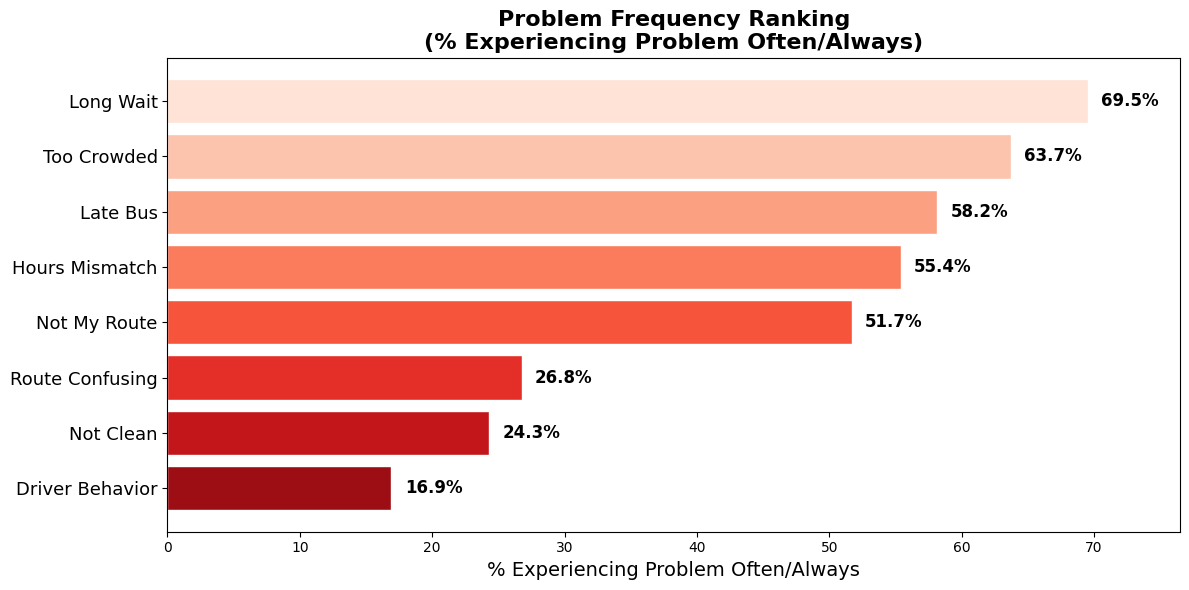

In [9]:
# =============================================================================
# FIGURE 4: Problems - % Often/Always Ranking
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

problem_vars = ['Problem_TooCrowded', 'Problem_LongWait', 'Problem_NotMyRoute',
                'Problem_HoursMismatch', 'Problem_LateBus', 'Problem_RouteConfusing',
                'Problem_NotClean', 'Problem_DriverBehavior']
problem_labels = ['Too Crowded', 'Long Wait', 'Not My Route', 'Hours Mismatch',
                  'Late Bus', 'Route Confusing', 'Not Clean', 'Driver Behavior']

# Map to numeric if needed
problem_map = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Always": 4}

# Calculate % Often/Always for each problem
problem_pct_often_always = {}
for var, label in zip(problem_vars, problem_labels):
    if var in df.columns:
        # Convert to numeric if needed
        if not pd.api.types.is_numeric_dtype(df[var]):
            df[var + '_num'] = df[var].map(problem_map)
        else:
            df[var + '_num'] = df[var]
        
        valid = df[var + '_num'].notna().sum()
        often_always = ((df[var + '_num'] >= 3) & (df[var + '_num'] <= 4)).sum()
        pct = (often_always / valid * 100) if valid > 0 else 0
        problem_pct_often_always[label] = pct

# Sort by percentage
problem_ranking = pd.Series(problem_pct_often_always).sort_values(ascending=True)

# Plot horizontal bar
colors = sns.color_palette("Reds_r", len(problem_ranking))
bars = ax.barh(range(len(problem_ranking)), problem_ranking.values, color=colors, edgecolor='white')

ax.set_yticks(range(len(problem_ranking)))
ax.set_yticklabels(problem_ranking.index, fontsize=13)
ax.set_xlabel('% Experiencing Problem Often/Always', fontsize=14)
ax.set_title('Problem Frequency Ranking\n(% Experiencing Problem Often/Always)', 
              fontweight='bold', fontsize=16)
ax.set_xlim(0, max(problem_ranking.values) * 1.1)

for i, (label, pct) in enumerate(problem_ranking.items()):
    ax.text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
plt.close()

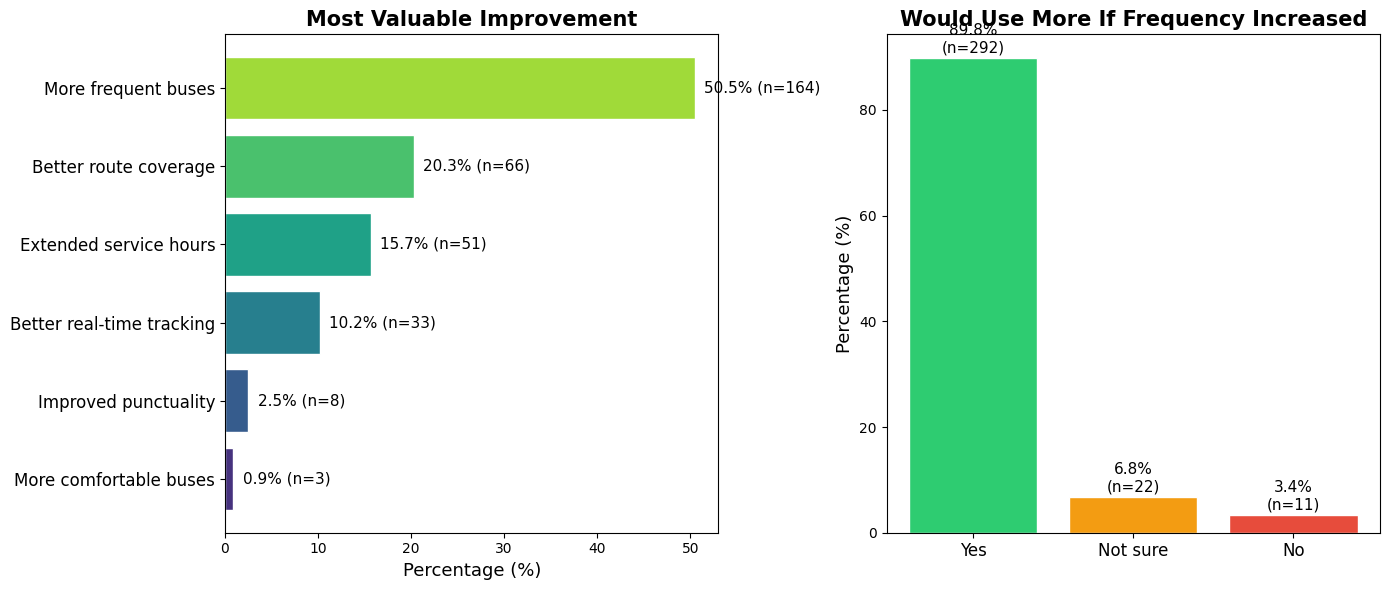

In [10]:
# =============================================================================
# FIGURE 5: Most Valuable Improvement - SORTED BAR CHART
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Most Valuable Improvement - HORIZONTAL BAR (sorted)
ax1 = axes[0]
improve_counts = df['MostValuable_Improvement'].value_counts()
improve_pct = (improve_counts / len(df) * 100).round(1)
improve_sorted = improve_pct.sort_values(ascending=True)

colors = sns.color_palette("viridis", len(improve_sorted))
bars = ax1.barh(range(len(improve_sorted)), improve_sorted.values, color=colors, edgecolor='white')
ax1.set_yticks(range(len(improve_sorted)))
ax1.set_yticklabels(improve_sorted.index, fontsize=12)
ax1.set_xlabel('Percentage (%)', fontsize=13)
ax1.set_title('Most Valuable Improvement', fontweight='bold', fontsize=15)
for i, (pct, count) in enumerate(zip(improve_sorted.values, improve_counts[improve_sorted.index].values)):
    ax1.text(pct + 1, i, f'{pct:.1f}% (n={count})', va='center', fontsize=11)

# UseMore_IfFrequent - BAR CHART
ax2 = axes[1]
usemore_counts = df['UseMore_IfFrequent'].value_counts()
usemore_pct = (usemore_counts / len(df) * 100).round(1)
colors2 = ['#2ecc71', '#f39c12', '#e74c3c']
bars2 = ax2.bar(range(len(usemore_counts)), usemore_pct.values, color=colors2, edgecolor='white')
ax2.set_xticks(range(len(usemore_counts)))
ax2.set_xticklabels(usemore_counts.index, fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=13)
ax2.set_title('Would Use More If Frequency Increased', fontweight='bold', fontsize=15)
for bar, pct, count in zip(bars2, usemore_pct.values, usemore_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{pct:.1f}%\n(n={count})', ha='center', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()

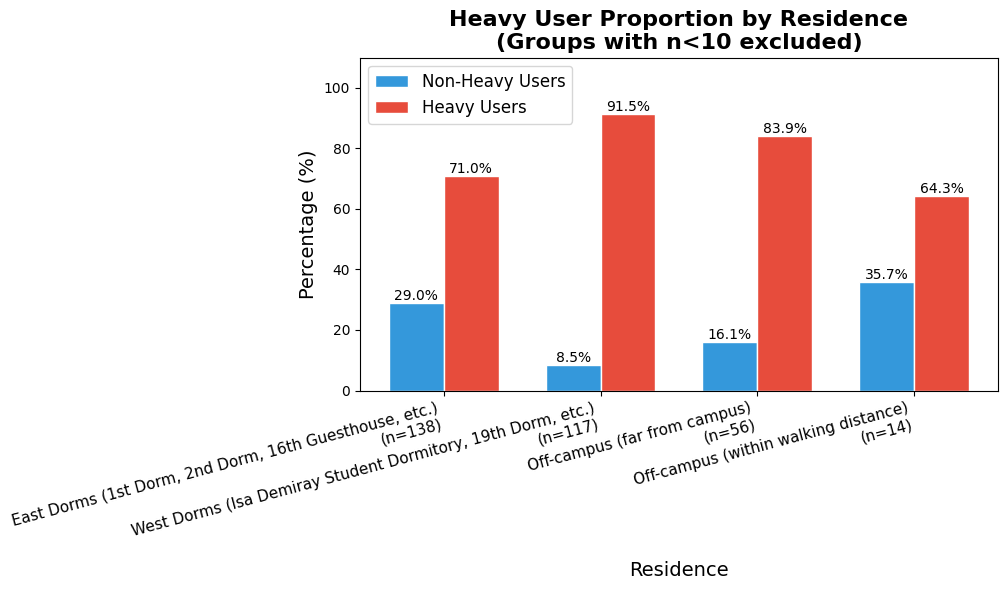

In [11]:
# =============================================================================
# FIGURE 6: Heavy User by Residence - WITH (n) LABELS
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 6))

# Get counts per residence
residence_counts = df['Residence'].value_counts()

# Filter out groups with n < 10
valid_residences = residence_counts[residence_counts >= 10].index
df_filtered = df[df['Residence'].isin(valid_residences)]

cross_pct = pd.crosstab(df_filtered['Residence'], df_filtered['Heavy_User'], normalize='index') * 100
cross_counts = pd.crosstab(df_filtered['Residence'], df_filtered['Heavy_User'])

# Sort by total count
residence_order = cross_counts.sum(axis=1).sort_values(ascending=False).index
cross_pct = cross_pct.reindex(residence_order)
cross_counts = cross_counts.reindex(residence_order)

x = np.arange(len(residence_order))
width = 0.35

bars1 = ax.bar(x - width/2, cross_pct[0].values, width, label='Non-Heavy Users', 
               color='#3498DB', edgecolor='white')
bars2 = ax.bar(x + width/2, cross_pct[1].values, width, label='Heavy Users', 
               color='#E74C3C', edgecolor='white')

ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_xlabel('Residence', fontsize=14)
ax.set_title('Heavy User Proportion by Residence\n(Groups with n<10 excluded)', 
             fontweight='bold', fontsize=16)
ax.set_xticks(x)
# Add (n) to labels
residence_labels_with_n = [f'{res}\n(n={residence_counts[res]})' for res in residence_order]
ax.set_xticklabels(residence_labels_with_n, rotation=15, ha='right', fontsize=11)
ax.legend(fontsize=12)
ax.set_ylim(0, 110)

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{bar.get_height():.1f}%', ha='center', fontsize=10)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{bar.get_height():.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
plt.close()

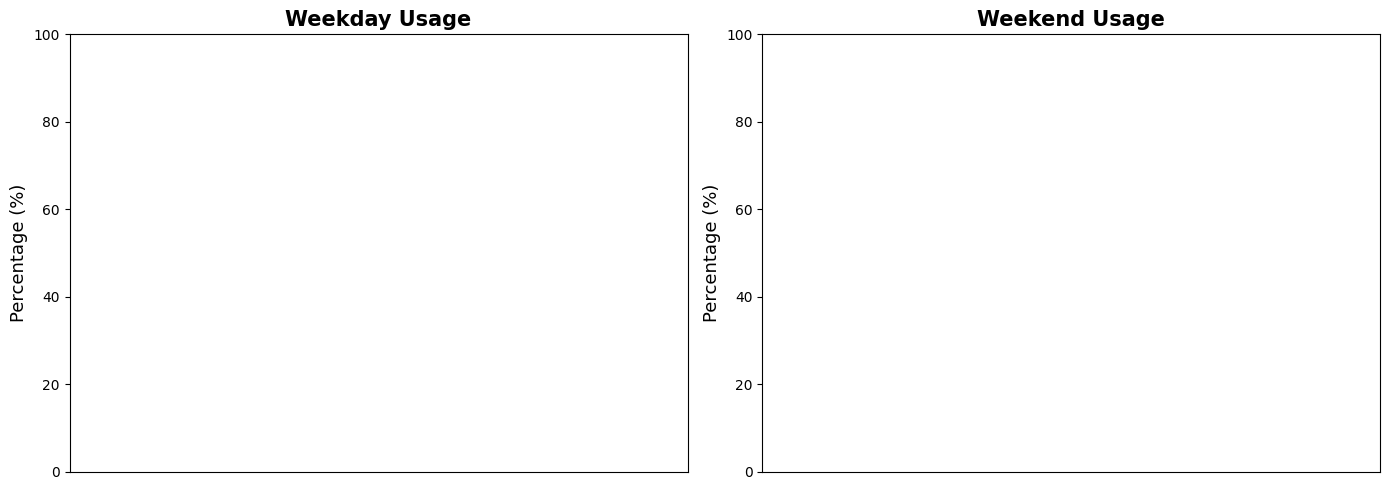

In [15]:
# =============================================================================
# FIGURE 7: Weekday vs Weekend - 100% STACKED BARS (FIXED)
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weekday - 100% stacked
weekday_map = {
    'Never': 'Never',
    'Very rarely': 'Rarely', 
    '1-2/week': 'Sometimes',
    '3-4/week': 'Often',
    'Once/day': 'Always',
    '>Once/day': 'Always'
}
weekday_cat = df['Weekday_Ring_Frequency'].map(weekday_map)
weekday_stacked = weekday_cat.value_counts(normalize=True).sort_index() * 100

# Weekend - 100% stacked  
weekend_map = {
    'Never': 'Never',
    'Rarely (1-2/month)': 'Rarely',
    'Sometimes (few/month)': 'Sometimes', 
    'Often (every wknd)': 'Often'
}
weekend_cat = df['Weekend_Ring_Frequency'].map(weekend_map)
weekend_stacked = weekend_cat.value_counts(normalize=True).sort_index() * 100

# Plot both as 100% stacked
categories = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
colors = sns.color_palette("Blues", len(categories))

for ax, data, title in zip([axes[0], axes[1]], [weekday_stacked, weekend_stacked], 
                            ['Weekday Usage', 'Weekend Usage']):
    bottom = 0
    bars_list = []  # Store bars for legend
    for i, cat in enumerate(categories):
        if cat in data.index:
            val = data[cat]
            bar = ax.bar([0], [val], bottom=bottom, label=cat, color=colors[i], edgecolor='white')
            bars_list.append(bar[0])  # Store first bar element
            if val > 3:  # Only label if > 3%
                ax.text(0, bottom + val/2, f'{val:.1f}%', ha='center', va='center', 
                       fontsize=11, fontweight='bold')
            bottom += val
    
    ax.set_ylim(0, 100)
    ax.set_xlim(-0.5, 0.5)
    ax.set_xticks([])
    ax.set_ylabel('Percentage (%)', fontsize=13)
    ax.set_title(title, fontweight='bold', fontsize=15)
    # FIX: Only create legend if we have bars with labels
    if bars_list:
        ax.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()
plt.close()

/tmp/ipykernel_44538/1892641083.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df[var + '_num'] = res_df[var]


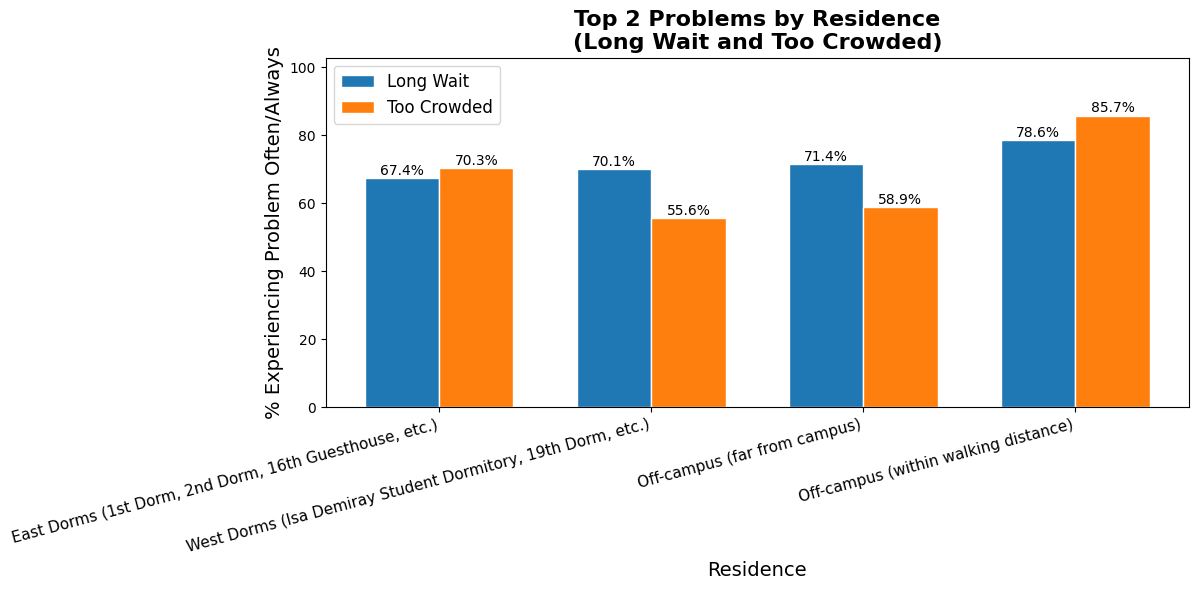

In [13]:
# =============================================================================
# FIGURE 8: Top 2 Problems by Residence (% Often/Always)
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

# Get top 2 problems overall
problem_pct_dict = {}
for var, label in zip(problem_vars, problem_labels):
    if var in df.columns:
        if not pd.api.types.is_numeric_dtype(df[var]):
            df[var + '_num'] = df[var].map(problem_map)
        else:
            df[var + '_num'] = df[var]
        valid = df[var + '_num'].notna().sum()
        often_always = ((df[var + '_num'] >= 3) & (df[var + '_num'] <= 4)).sum()
        pct = (often_always / valid * 100) if valid > 0 else 0
        problem_pct_dict[label] = pct

top_2_problems = pd.Series(problem_pct_dict).nlargest(2).index.tolist()
top_2_vars = [problem_vars[problem_labels.index(p)] for p in top_2_problems]

# Calculate by residence
residence_list = df['Residence'].value_counts()[df['Residence'].value_counts() >= 10].index
residence_problem_data = {}

for residence in residence_list:
    res_df = df[df['Residence'] == residence]
    residence_problem_data[residence] = {}
    for prob_name, var in zip(top_2_problems, top_2_vars):
        if var in res_df.columns:
            if not pd.api.types.is_numeric_dtype(res_df[var]):
                res_df[var + '_num'] = res_df[var].map(problem_map)
            else:
                res_df[var + '_num'] = res_df[var]
            valid = res_df[var + '_num'].notna().sum()
            often_always = ((res_df[var + '_num'] >= 3) & (res_df[var + '_num'] <= 4)).sum()
            pct = (often_always / valid * 100) if valid > 0 else 0
            residence_problem_data[residence][prob_name] = pct

residence_problem_df = pd.DataFrame(residence_problem_data).T

# Plot grouped bar
x = np.arange(len(residence_problem_df))
width = 0.35

for i, prob in enumerate(top_2_problems):
    offset = (i - 0.5) * width
    bars = ax.bar(x + offset, residence_problem_df[prob].values, width, 
                  label=prob, edgecolor='white')
    for j, (bar, val) in enumerate(zip(bars, residence_problem_df[prob].values)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.1f}%', ha='center', fontsize=10)

ax.set_ylabel('% Experiencing Problem Often/Always', fontsize=14)
ax.set_xlabel('Residence', fontsize=14)
ax.set_title(f'Top 2 Problems by Residence\n({top_2_problems[0]} and {top_2_problems[1]})', 
             fontweight='bold', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(residence_problem_df.index, rotation=15, ha='right', fontsize=11)
ax.legend(fontsize=12)
ax.set_ylim(0, max(residence_problem_df.max()) * 1.2)

plt.tight_layout()
plt.show()
plt.close()

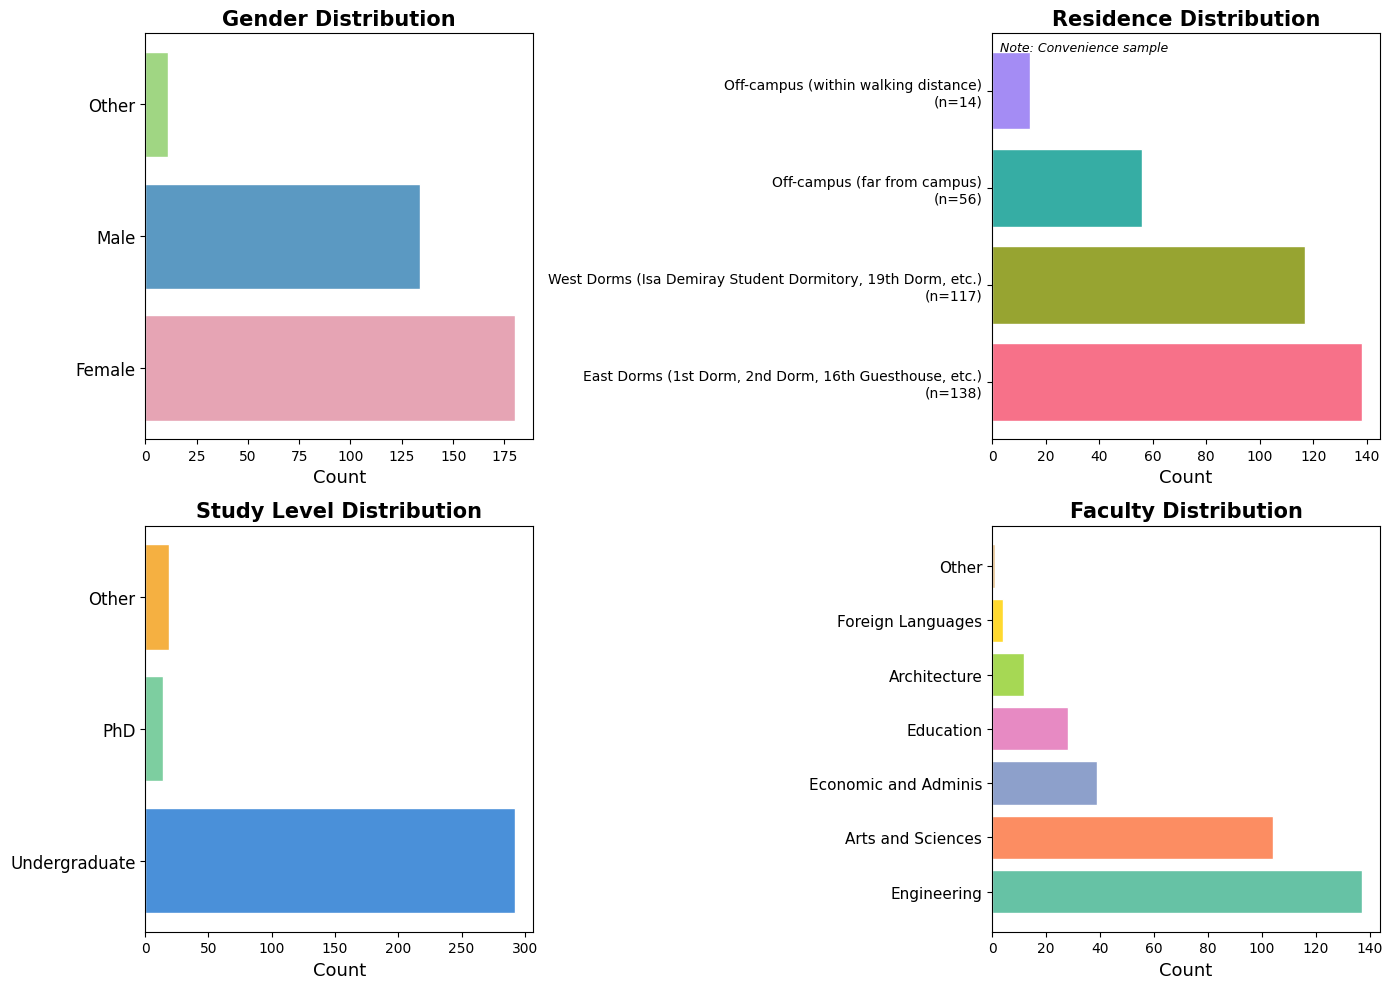

In [16]:
# =============================================================================
# FIGURE 1: Demographic Profile - COUNTS ONLY (No Percentages)
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender - BAR CHART (counts)
ax1 = axes[0, 0]
gender_counts = df['Gender'].value_counts()
colors = ['#E6A4B4', '#5B99C2', '#A0D683']
bars = ax1.barh(range(len(gender_counts)), gender_counts.values, color=colors, edgecolor='white')
ax1.set_yticks(range(len(gender_counts)))
ax1.set_yticklabels(gender_counts.index, fontsize=12)
ax1.set_xlabel('Count', fontsize=13)
ax1.set_title('Gender Distribution', fontweight='bold', fontsize=15)
# No text labels on bars

# Residence - BAR CHART (counts)
ax2 = axes[0, 1]
residence_counts = df['Residence'].value_counts()
colors2 = sns.color_palette("husl", len(residence_counts))
bars = ax2.barh(range(len(residence_counts)), residence_counts.values, color=colors2, edgecolor='white')
ax2.set_yticks(range(len(residence_counts)))
ax2.set_yticklabels(residence_counts.index, fontsize=11)
ax2.set_xlabel('Count', fontsize=13)
ax2.set_title('Residence Distribution', fontweight='bold', fontsize=15)
# Add (n) to labels only
residence_labels_with_n = [f'{res}\n(n={count})' for res, count in zip(residence_counts.index, residence_counts.values)]
ax2.set_yticklabels(residence_labels_with_n, fontsize=10)
ax2.text(0.02, 0.98, 'Note: Convenience sample', transform=ax2.transAxes, 
         fontsize=9, style='italic', ha='left', va='top')

# Study Level - BAR CHART (counts)
ax3 = axes[1, 0]
study_counts = df['Study_Level'].value_counts()
# Combine small groups
undergrad_count = study_counts[study_counts.index.str.contains('Undergrad|Bachelor', case=False, na=False)].sum()
phd_count = study_counts[study_counts.index.str.contains('PhD|Doctoral', case=False, na=False)].sum()
others_count = study_counts.sum() - undergrad_count - phd_count
combined_study = pd.Series({
    'Undergraduate': undergrad_count,
    'PhD': phd_count,
    'Other': others_count
})
combined_study = combined_study[combined_study > 0]
colors3 = ['#4A90D9', '#7DCEA0', '#F5B041']
bars = ax3.barh(range(len(combined_study)), combined_study.values, 
                color=colors3[:len(combined_study)], edgecolor='white')
ax3.set_yticks(range(len(combined_study)))
ax3.set_yticklabels(combined_study.index, fontsize=12)
ax3.set_xlabel('Count', fontsize=13)
ax3.set_title('Study Level Distribution', fontweight='bold', fontsize=15)
# No text labels on bars

# Faculty - BAR CHART (counts, top 6 + Other)
ax4 = axes[1, 1]
faculty_counts = df['Faculty'].value_counts()
# Keep top 6, combine rest as "Other"
top_6_faculty = faculty_counts.head(6)
other_faculty_count = faculty_counts.iloc[6:].sum() if len(faculty_counts) > 6 else 0
if other_faculty_count > 0:
    faculty_final = pd.concat([top_6_faculty, pd.Series({'Other': other_faculty_count})])
else:
    faculty_final = top_6_faculty

faculty_labels_short = [f.replace('Faculty of ', '').replace('School of ', '')[:20] 
                        if len(f.replace('Faculty of ', '').replace('School of ', '')) > 20 
                        else f.replace('Faculty of ', '').replace('School of ', '') 
                        for f in faculty_final.index]
colors4 = sns.color_palette("Set2", len(faculty_final))
bars = ax4.barh(range(len(faculty_final)), faculty_final.values, color=colors4, edgecolor='white')
ax4.set_yticks(range(len(faculty_final)))
ax4.set_yticklabels(faculty_labels_short, fontsize=11)
ax4.set_xlabel('Count', fontsize=13)
ax4.set_title('Faculty Distribution', fontweight='bold', fontsize=15)
# No text labels on bars

plt.tight_layout()
plt.show()
plt.close()

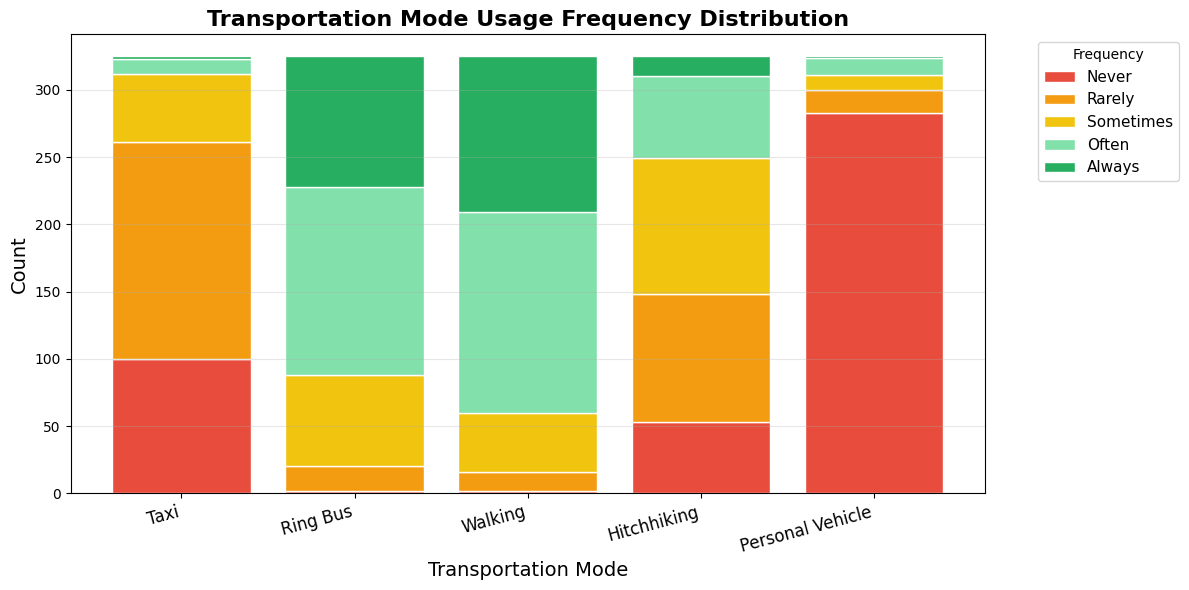

In [17]:
# =============================================================================
# FIGURE 2: Transportation Mode - STACKED COUNTS (Not Percentages)
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

transport_vars = ['Freq_Taxi', 'Freq_Ring', 'Freq_Walking', 'Freq_Hitchhiking', 'Freq_PersonalVehicle']
transport_labels = ['Taxi', 'Ring Bus', 'Walking', 'Hitchhiking', 'Personal Vehicle']

# Map frequency to categories
def map_freq_to_category(val):
    if pd.isna(val):
        return 'Never'
    if val <= 1:
        return 'Never'
    elif val <= 2:
        return 'Rarely'
    elif val <= 3:
        return 'Sometimes'
    elif val <= 4:
        return 'Often'
    else:
        return 'Always'

# Create stacked data (COUNTS, not percentages)
stacked_data = {}
for var, label in zip(transport_vars, transport_labels):
    categories = df[var].apply(map_freq_to_category)
    stacked_data[label] = categories.value_counts()  # Counts, not normalize

stacked_df = pd.DataFrame(stacked_data).fillna(0)
stacked_df = stacked_df.reindex(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], fill_value=0)

# Plot stacked bar (counts)
colors_stack = ['#E74C3C', '#F39C12', '#F1C40F', '#82E0AA', '#27AE60']
bottom = np.zeros(len(transport_labels))
for i, (category, color) in enumerate(zip(['Never', 'Rarely', 'Sometimes', 'Often', 'Always'], colors_stack)):
    if category in stacked_df.index:
        values = stacked_df.loc[category].values
        ax.bar(transport_labels, values, bottom=bottom, label=category, color=color, edgecolor='white')
        bottom += values

ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Transportation Mode', fontsize=14)
ax.set_title('Transportation Mode Usage Frequency Distribution', 
              fontweight='bold', fontsize=16)
ax.set_xticks(range(len(transport_labels)))
ax.set_xticklabels(transport_labels, rotation=15, ha='right', fontsize=12)
ax.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

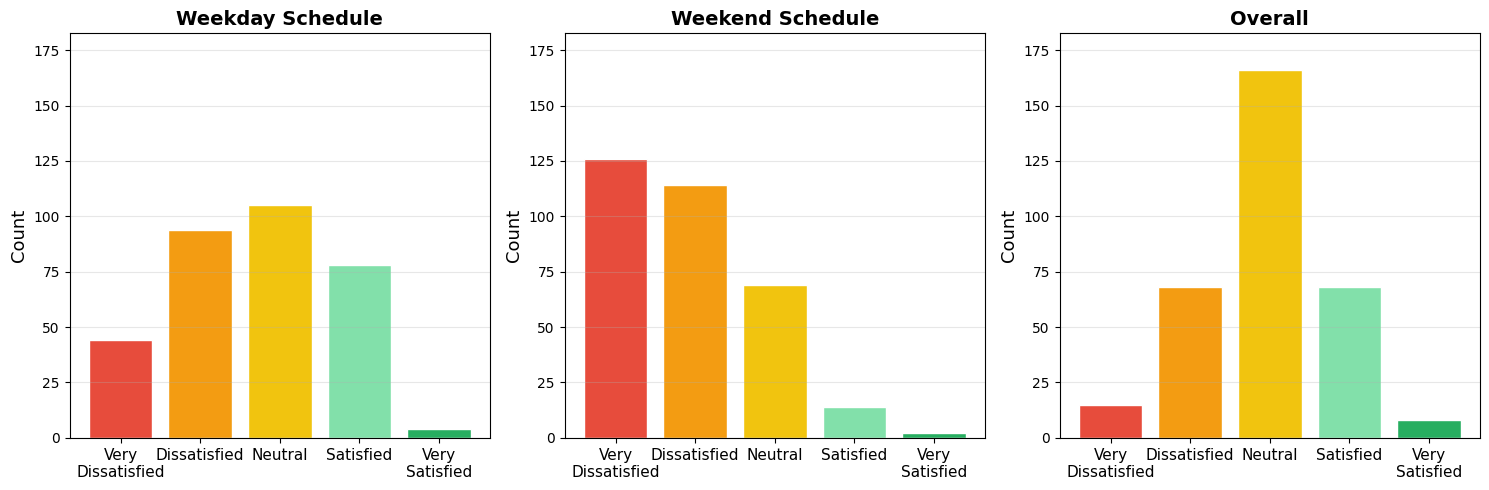

In [18]:
# =============================================================================
# FIGURE 3: Satisfaction - THREE PANELS (Counts Only)
# =============================================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sat_vars = ['Weekday_Schedule_Satisfaction', 'Weekend_Schedule_Satisfaction', 'Overall_Satisfaction']
sat_labels = ['Weekday Schedule', 'Weekend Schedule', 'Overall']

# Get max count for consistent y-axis
max_count = 0
for var in sat_vars:
    counts = df[var].value_counts().sort_index()
    max_count = max(max_count, counts.max())

colors_sat = ['#E74C3C', '#F39C12', '#F1C40F', '#82E0AA', '#27AE60']
sat_label_names = ['Very\nDissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very\nSatisfied']

for ax, var, label in zip(axes, sat_vars, sat_labels):
    counts = df[var].value_counts().sort_index()
    # Get counts for 1-5
    count_values = [counts.get(i, 0) for i in range(1, 6)]
    bars = ax.bar(range(1, 6), count_values, color=colors_sat, edgecolor='white')
    ax.set_xticks(range(1, 6))
    ax.set_xticklabels(sat_label_names, fontsize=11)
    ax.set_ylabel('Count', fontsize=13)
    ax.set_title(label, fontweight='bold', fontsize=14)
    ax.set_ylim(0, max_count * 1.1)  # Same scale across all
    ax.grid(axis='y', alpha=0.3)
    # No text labels on bars

plt.tight_layout()
plt.show()
plt.close()

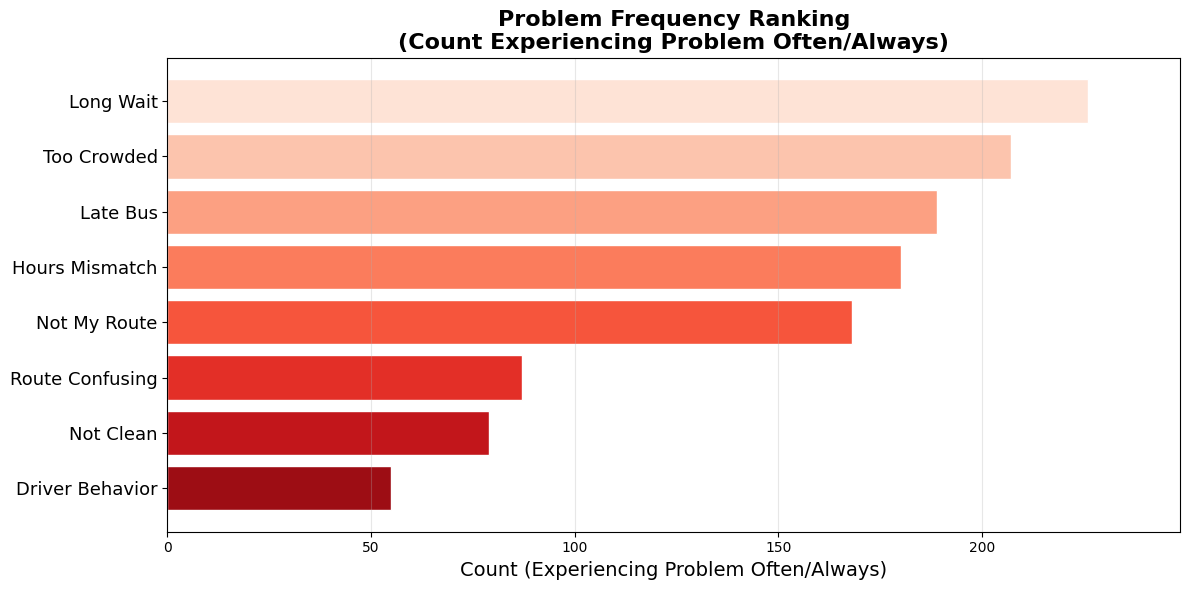

In [19]:
# =============================================================================
# FIGURE 4: Problems - COUNT of Often/Always (Not Percentage)
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

problem_vars = ['Problem_TooCrowded', 'Problem_LongWait', 'Problem_NotMyRoute',
                'Problem_HoursMismatch', 'Problem_LateBus', 'Problem_RouteConfusing',
                'Problem_NotClean', 'Problem_DriverBehavior']
problem_labels = ['Too Crowded', 'Long Wait', 'Not My Route', 'Hours Mismatch',
                  'Late Bus', 'Route Confusing', 'Not Clean', 'Driver Behavior']

problem_map = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Always": 4}

# Calculate COUNT of Often/Always for each problem
problem_count_often_always = {}
for var, label in zip(problem_vars, problem_labels):
    if var in df.columns:
        # Convert to numeric if needed
        if not pd.api.types.is_numeric_dtype(df[var]):
            var_num = df[var].map(problem_map)
        else:
            var_num = df[var]
        
        often_always = ((var_num >= 3) & (var_num <= 4)).sum()
        problem_count_often_always[label] = often_always

# Sort by count
problem_ranking = pd.Series(problem_count_often_always).sort_values(ascending=True)

# Plot horizontal bar (counts)
colors = sns.color_palette("Reds_r", len(problem_ranking))
bars = ax.barh(range(len(problem_ranking)), problem_ranking.values, color=colors, edgecolor='white')

ax.set_yticks(range(len(problem_ranking)))
ax.set_yticklabels(problem_ranking.index, fontsize=13)
ax.set_xlabel('Count (Experiencing Problem Often/Always)', fontsize=14)
ax.set_title('Problem Frequency Ranking\n(Count Experiencing Problem Often/Always)', 
              fontweight='bold', fontsize=16)
ax.set_xlim(0, max(problem_ranking.values) * 1.1)
ax.grid(axis='x', alpha=0.3)
# No text labels on bars

plt.tight_layout()
plt.show()
plt.close()

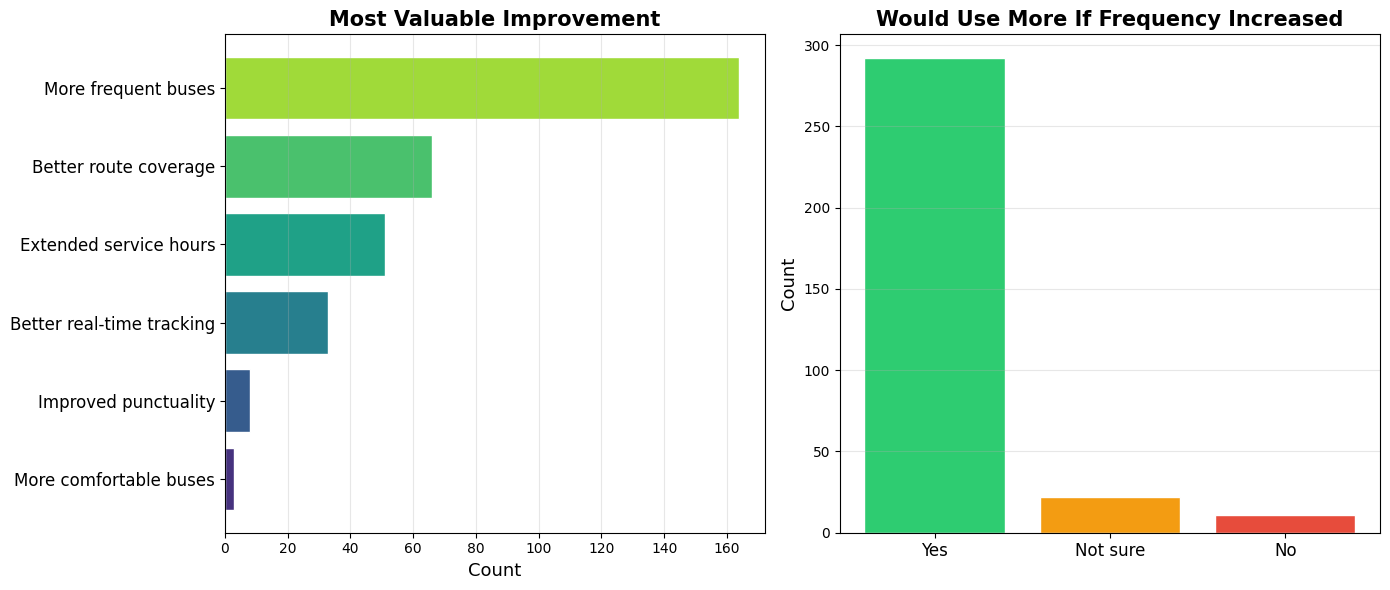

In [20]:
# =============================================================================
# FIGURE 5: Most Valuable Improvement - COUNTS ONLY
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Most Valuable Improvement - HORIZONTAL BAR (sorted by count)
ax1 = axes[0]
improve_counts = df['MostValuable_Improvement'].value_counts()
improve_sorted = improve_counts.sort_values(ascending=True)

colors = sns.color_palette("viridis", len(improve_sorted))
bars = ax1.barh(range(len(improve_sorted)), improve_sorted.values, color=colors, edgecolor='white')
ax1.set_yticks(range(len(improve_sorted)))
ax1.set_yticklabels(improve_sorted.index, fontsize=12)
ax1.set_xlabel('Count', fontsize=13)
ax1.set_title('Most Valuable Improvement', fontweight='bold', fontsize=15)
ax1.grid(axis='x', alpha=0.3)
# No text labels on bars

# UseMore_IfFrequent - BAR CHART (counts)
ax2 = axes[1]
usemore_counts = df['UseMore_IfFrequent'].value_counts()
colors2 = ['#2ecc71', '#f39c12', '#e74c3c']
bars2 = ax2.bar(range(len(usemore_counts)), usemore_counts.values, color=colors2, edgecolor='white')
ax2.set_xticks(range(len(usemore_counts)))
ax2.set_xticklabels(usemore_counts.index, fontsize=12)
ax2.set_ylabel('Count', fontsize=13)
ax2.set_title('Would Use More If Frequency Increased', fontweight='bold', fontsize=15)
ax2.grid(axis='y', alpha=0.3)
# No text labels on bars (only 3 bars, but keep clean)

plt.tight_layout()
plt.show()
plt.close()

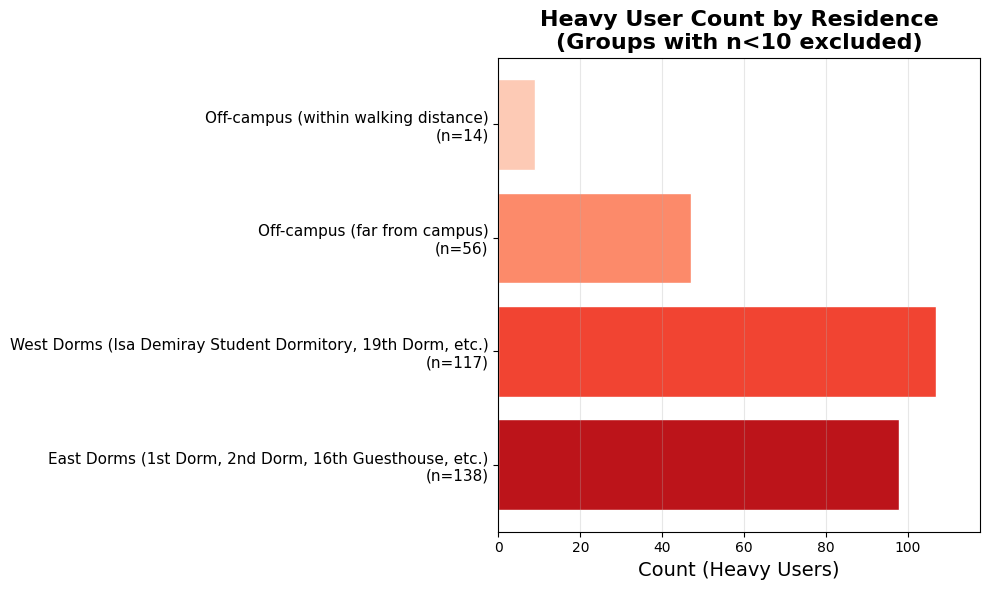

In [21]:
# =============================================================================
# FIGURE 6: Heavy User by Residence - COUNTS ONLY
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 6))

# Get counts per residence
residence_counts = df['Residence'].value_counts()

# Filter out groups with n < 10
valid_residences = residence_counts[residence_counts >= 10].index
df_filtered = df[df['Residence'].isin(valid_residences)]

# Get counts of Heavy Users per residence
heavy_user_counts = df_filtered[df_filtered['Heavy_User'] == 1]['Residence'].value_counts()
# Reindex to match residence order
residence_order = residence_counts[residence_counts >= 10].sort_values(ascending=False).index
heavy_user_counts = heavy_user_counts.reindex(residence_order, fill_value=0)

# Plot horizontal bars (counts only)
colors = sns.color_palette("Reds_r", len(heavy_user_counts))
bars = ax.barh(range(len(heavy_user_counts)), heavy_user_counts.values, color=colors, edgecolor='white')

ax.set_yticks(range(len(heavy_user_counts)))
# Add (n) to labels
residence_labels_with_n = [f'{res}\n(n={residence_counts[res]})' for res in heavy_user_counts.index]
ax.set_yticklabels(residence_labels_with_n, fontsize=11)
ax.set_xlabel('Count (Heavy Users)', fontsize=14)
ax.set_title('Heavy User Count by Residence\n(Groups with n<10 excluded)', 
             fontweight='bold', fontsize=16)
ax.set_xlim(0, max(heavy_user_counts.values) * 1.1)
ax.grid(axis='x', alpha=0.3)
# No text labels on bars

plt.tight_layout()
plt.show()
plt.close()

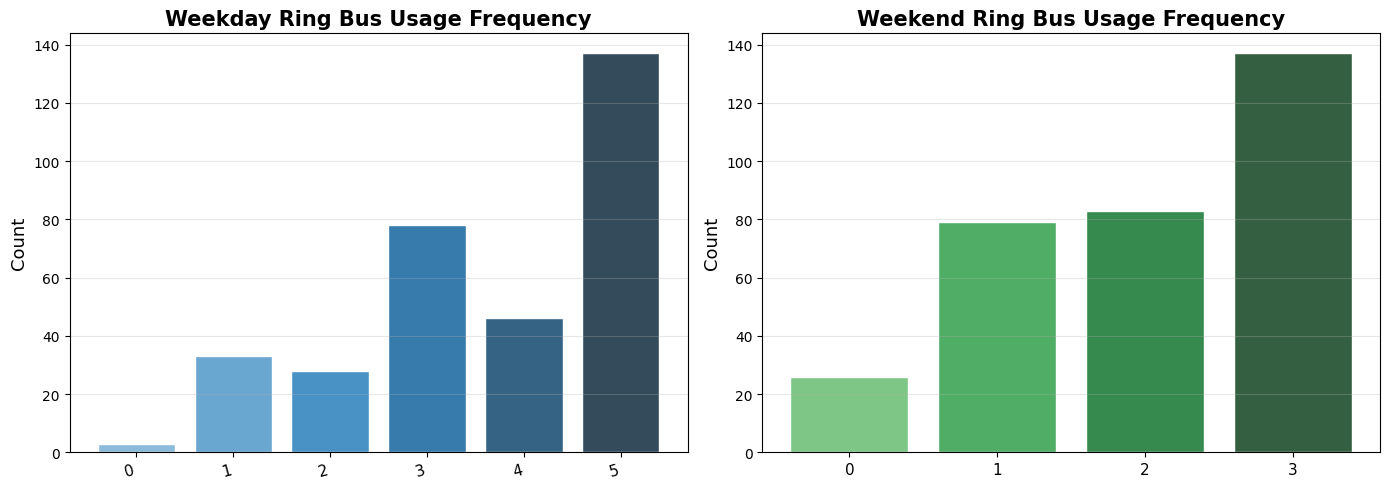

In [22]:
# =============================================================================
# FIGURE 7: Weekday vs Weekend - COUNT BARS (Comparable Format)
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weekday - Count bars
ax1 = axes[0]
weekday_counts = df['Weekday_Ring_Frequency'].value_counts().sort_index()
# Shorten labels
weekday_label_map = {
    'Never': 'Never',
    'Very rarely': 'V. rarely',
    '1-2/week': '1-2/week',
    '3-4/week': '3-4/week',
    'Once/day': 'Once/day',
    '>Once/day': '>Once/day'
}
weekday_labels = [weekday_label_map.get(idx, idx) for idx in weekday_counts.index]
colors_wk = sns.color_palette("Blues_d", len(weekday_counts))
bars1 = ax1.bar(range(len(weekday_counts)), weekday_counts.values, color=colors_wk, edgecolor='white')
ax1.set_xticks(range(len(weekday_counts)))
ax1.set_xticklabels(weekday_labels, rotation=15, ha='right', fontsize=11)
ax1.set_ylabel('Count', fontsize=13)
ax1.set_title('Weekday Ring Bus Usage Frequency', fontweight='bold', fontsize=15)
ax1.grid(axis='y', alpha=0.3)
# No text labels on bars

# Weekend - Count bars
ax2 = axes[1]
weekend_counts = df['Weekend_Ring_Frequency'].value_counts().sort_index()
# Shorten labels
weekend_label_map = {
    'Never': 'Never',
    'Rarely (1-2/month)': 'Rarely',
    'Sometimes (few/month)': 'Sometimes',
    'Often (every wknd)': 'Often'
}
weekend_labels = [weekend_label_map.get(idx, idx) for idx in weekend_counts.index]
colors_we = sns.color_palette("Greens_d", len(weekend_counts))
bars2 = ax2.bar(range(len(weekend_counts)), weekend_counts.values, color=colors_we, edgecolor='white')
ax2.set_xticks(range(len(weekend_counts)))
ax2.set_xticklabels(weekend_labels, fontsize=11)
ax2.set_ylabel('Count', fontsize=13)
ax2.set_title('Weekend Ring Bus Usage Frequency', fontweight='bold', fontsize=15)
ax2.grid(axis='y', alpha=0.3)
# No text labels on bars

plt.tight_layout()
plt.show()
plt.close()

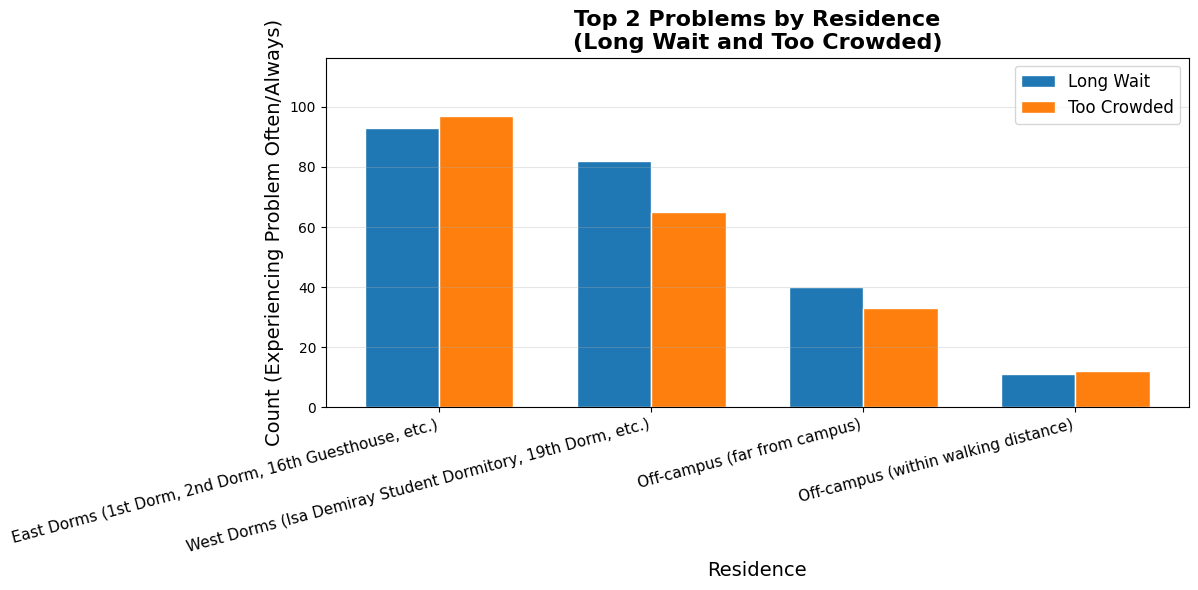

In [23]:
# =============================================================================
# FIGURE 8: Top 2 Problems by Residence - COUNTS Often/Always
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

problem_vars = ['Problem_TooCrowded', 'Problem_LongWait', 'Problem_NotMyRoute',
                'Problem_HoursMismatch', 'Problem_LateBus', 'Problem_RouteConfusing',
                'Problem_NotClean', 'Problem_DriverBehavior']
problem_labels = ['Too Crowded', 'Long Wait', 'Not My Route', 'Hours Mismatch',
                  'Late Bus', 'Route Confusing', 'Not Clean', 'Driver Behavior']
problem_map = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Always": 4}

# Get top 2 problems overall (by count)
problem_count_dict = {}
for var, label in zip(problem_vars, problem_labels):
    if var in df.columns:
        if not pd.api.types.is_numeric_dtype(df[var]):
            var_num = df[var].map(problem_map)
        else:
            var_num = df[var]
        often_always = ((var_num >= 3) & (var_num <= 4)).sum()
        problem_count_dict[label] = often_always

top_2_problems = pd.Series(problem_count_dict).nlargest(2).index.tolist()
top_2_vars = [problem_vars[problem_labels.index(p)] for p in top_2_problems]

# Calculate by residence (COUNTS)
residence_list = df['Residence'].value_counts()[df['Residence'].value_counts() >= 10].index
residence_problem_data = {}

for residence in residence_list:
    res_df = df[df['Residence'] == residence].copy()
    residence_problem_data[residence] = {}
    for prob_name, var in zip(top_2_problems, top_2_vars):
        if var in res_df.columns:
            if not pd.api.types.is_numeric_dtype(res_df[var]):
                res_df.loc[:, var + '_num'] = res_df[var].map(problem_map)
            else:
                res_df.loc[:, var + '_num'] = res_df[var]
            often_always = ((res_df[var + '_num'] >= 3) & (res_df[var + '_num'] <= 4)).sum()
            residence_problem_data[residence][prob_name] = often_always

residence_problem_df = pd.DataFrame(residence_problem_data).T

# Plot grouped bar (counts)
x = np.arange(len(residence_problem_df))
width = 0.35

for i, prob in enumerate(top_2_problems):
    offset = (i - 0.5) * width
    bars = ax.bar(x + offset, residence_problem_df[prob].values, width, 
                  label=prob, edgecolor='white')
    # No text labels on bars

ax.set_ylabel('Count (Experiencing Problem Often/Always)', fontsize=14)
ax.set_xlabel('Residence', fontsize=14)
ax.set_title(f'Top 2 Problems by Residence\n({top_2_problems[0]} and {top_2_problems[1]})', 
             fontweight='bold', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(residence_problem_df.index, rotation=15, ha='right', fontsize=11)
ax.legend(fontsize=12)
ax.set_ylim(0, max(residence_problem_df.max()) * 1.2)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()